## **Installing necessary Libraries**

In [1]:
pip install opencv-python

In [2]:
!pip install bing-image-downloader

In [3]:
!mkdir image_dataset

## **Downloading Healthy Images for Dataset**

In [4]:
from bing_image_downloader import downloader
downloader.download("healthy leaves", limit=100,  output_dir='image_dataset', adult_filter_off=True)

[%] Downloading Images to /content/image_dataset/healthy leaves


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://healthyhuemans.com/wp-content/uploads/2019/04/Saluyot-Leaves.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://stockarch.com/files/15/10/green_foliage.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://get.pxhere.com/photo/plant-leaf-flower-summer-herb-produce-lemonade-garden-healthy-leaves-frisch-herbs-balm-flowering-plant-urtica-herb-garden-spearmint-lemon-balm-annual-plant-apple-mint-land-plant-perilla-723330.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://img00.deviantart.net/cf2a/i/2011/261/d/f/healthy_leaves_by_haxb-d4a9q03.png
[%] File Downloaded !

[%] Downloading Image #5 from https://lukecoutinho.com/blog/wp-content/uploads/2022/07/Pixabay-Anand-Bijal.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.thestatesman.com/wp-content/uploads/2020/02/il.jpg
[%] 

## **Downloading Disease leaf Images for Dataset**

In [6]:
from bing_image_downloader import downloader
downloader.download("disease leaf", limit=100,  output_dir='image_dataset', adult_filter_off=True)

[%] Downloading Images to /content/image_dataset/disease leaf


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from http://nwdistrict.ifas.ufl.edu/hort/files/2012/06/cercospora_hydrangea.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.cardinallawns.com/wp-content/uploads/2018/04/leaf-spots.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.familyhandyman.com/wp-content/uploads/2020/05/Black-Spot-Diplocarpon-rosae-GettyImages-1097545284.jpg?w=1200
[%] File Downloaded !

[%] Downloading Image #4 from https://usercontent1.hubstatic.com/14187662_f520.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.familyhandyman.com/wp-content/uploads/2020/04/Powdery-Mildew-GettyImages-1090508010.jpg?resize=1024
[%] File Downloaded !

[%] Downloading Image #6 from https://www.gardeningknowhow.com/wp-content/uploads/2020/11/leaf-spot-disease.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://extensio

## **Removing Duplicates (if any)**

In [14]:
import os
import hashlib

def find_duplicates(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            # Calculate the hash of the image
            with open(file_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
            # Check for duplicates
            if file_hash in hashes:
                duplicates.append(file_path)
            else:
                hashes[file_hash] = file_path

    return duplicates

folder_path = '/content/image_dataset'
duplicates = find_duplicates(folder_path)
print(f"Found {len(duplicates)} duplicates.")
# Optionally, delete duplicates
for duplicate in duplicates:
    os.remove(duplicate)
    print(f"Deleted duplicate image: {duplicate}")


Found 0 duplicates.


## **Resizing Images**

In [15]:
import os
import cv2

def resize_images_in_folder(folder_path, output_folder, target_size=(224, 224)):

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the folder
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        # Read the image
        image = cv2.imread(image_path)

        # Check if the image was loaded successfully
        if image is None:
            print(f"Skipping invalid file: {image_path}")
            continue

        # Resize the image
        resized_image = cv2.resize(image, target_size)

        # Save the resized image to the output folder
        output_path = os.path.join(output_folder, image_name)
        cv2.imwrite(output_path, resized_image)

        print(f"Resized and saved: {output_path}")

# Paths to dataset folders
dataset_path = "/content/image_dataset"
folders = ["healthy leaves", "disease leaf"]

# Target size for resizing
resize_to = (224, 224)

# Loop through each folder in the dataset
for folder in folders:
    input_folder = os.path.join(dataset_path, folder)
    output_folder = os.path.join(dataset_path, folder + "_resized")

    # Resize images
    resize_images_in_folder(input_folder, output_folder, target_size=resize_to)

print("All images resized successfully.")


Resized and saved: /content/image_dataset/healthy leaves_resized/Image_38.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_1.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_73.jpeg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_88.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_97.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_6.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_96.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_92.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_12.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_49.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_20.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/Image_60.jpg
Resized and saved: /content/image_dataset/healthy leaves_resized/

### **Feature Extraction**

In [16]:
import os
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

def process_and_extract_features(folder_path, target_size=(224, 224)):

    # Load pre-trained VGG16 model
    vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    feature_extractor = Model(inputs=vgg16_base.input, outputs=vgg16_base.output)

    # Dictionary to store feature maps
    feature_maps = {}

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)

        # Load and normalize the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Skipping invalid file: {image_path}")
            continue

        image = cv2.resize(image, target_size)
        normalized_image = image / 255.0

        # Preprocess for VGG16
        input_image = np.expand_dims(normalized_image, axis=0)
        preprocessed_image = preprocess_input(input_image)

        # Extract features using VGG16
        features = feature_extractor.predict(preprocessed_image)
        feature_maps[image_name] = features

        print(f"Processed and extracted features for: {image_name}")

    return feature_maps

# Paths to the folders with resized images
dataset_path = "/content/image_dataset"
folders = ["healthy leaves_resized", "disease leaf_resized"]

# Process each folder and extract features
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    print(f"Processing images in folder: {folder_path}")

    features = process_and_extract_features(folder_path)
    print(f"Feature extraction complete for folder: {folder}")


Processing images in folder: /content/image_dataset/healthy leaves_resized
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
Processed and extracted features for: Image_38.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Processed and extracted features for: Image_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
Processed and extracted features for: Image_73.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
Processed and extracted features for: Image_88.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Processed and extracted features for: Image_97.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Processed and extracted features for: Image_6.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Processed and extracted features for: Image_96.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
Processed and extracted features for: Image_92.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
Processed and extracted features for: Image_12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Processed and extracted fe

## **Image Preprocessing**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

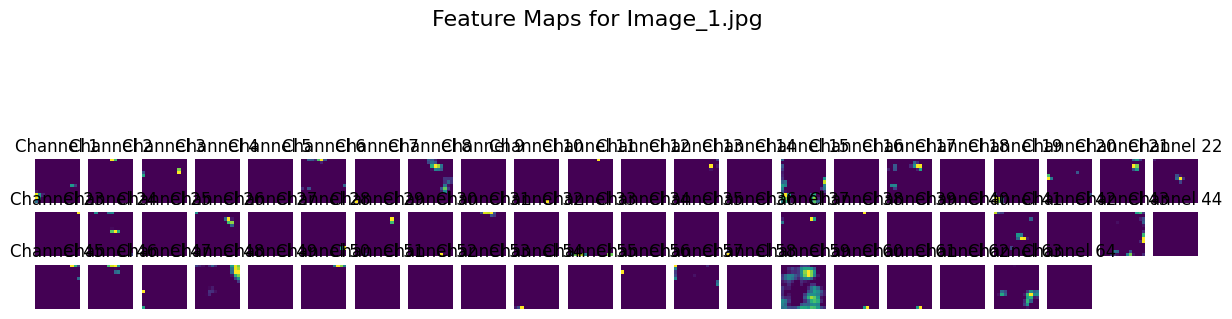

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Path to the dataset
dataset_path = "/content/image_dataset"

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Create a new model that outputs the feature maps
layer_name = 'block5_conv3'
model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Function to load and preprocess the image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Preprocess the image for VGG16
    return img_array

# Function to extract and store feature maps for each image
def extract_feature_maps(dataset_path):
    feature_maps = {}
    for folder_name in ['healthy leaves', 'disease leaf']:
        folder_path = os.path.join(dataset_path, folder_name)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)


            if os.path.isdir(img_path):
                continue

            # Process only image files
            img_array = preprocess_image(img_path)
            feature_map = model.predict(img_array)  # Extract feature map
            feature_maps[img_name] = feature_map  # Store the feature map for each image
    return feature_maps

# Extract feature maps for all images in the dataset
feature_maps = extract_feature_maps(dataset_path)

# Function to visualize the feature maps of a specific image
def visualize_feature_map(image_name, feature_map):

    # Get the number of channels in the feature map
    num_channels = feature_map.shape[-1]

    # Determine the number of rows and columns to display the feature maps
    grid_size = int(np.sqrt(num_channels))  # Grid size for plotting

    # Create a figure to display the feature maps
    plt.figure(figsize=(15, 15))

    for i in range(min(64, num_channels)):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
        plt.axis('off')
        plt.title(f"Channel {i+1}")

    plt.suptitle(f"Feature Maps for {image_name}", fontsize=16)
    plt.show()

# Visualize the feature maps for a specific image
image_name = "Image_1.jpg"
if image_name in feature_maps:
    feature_map = feature_maps[image_name]
    visualize_feature_map(image_name, feature_map)
else:
    print(f"Image {image_name} not found in the feature maps")


## **Collecting Specific Features from images**

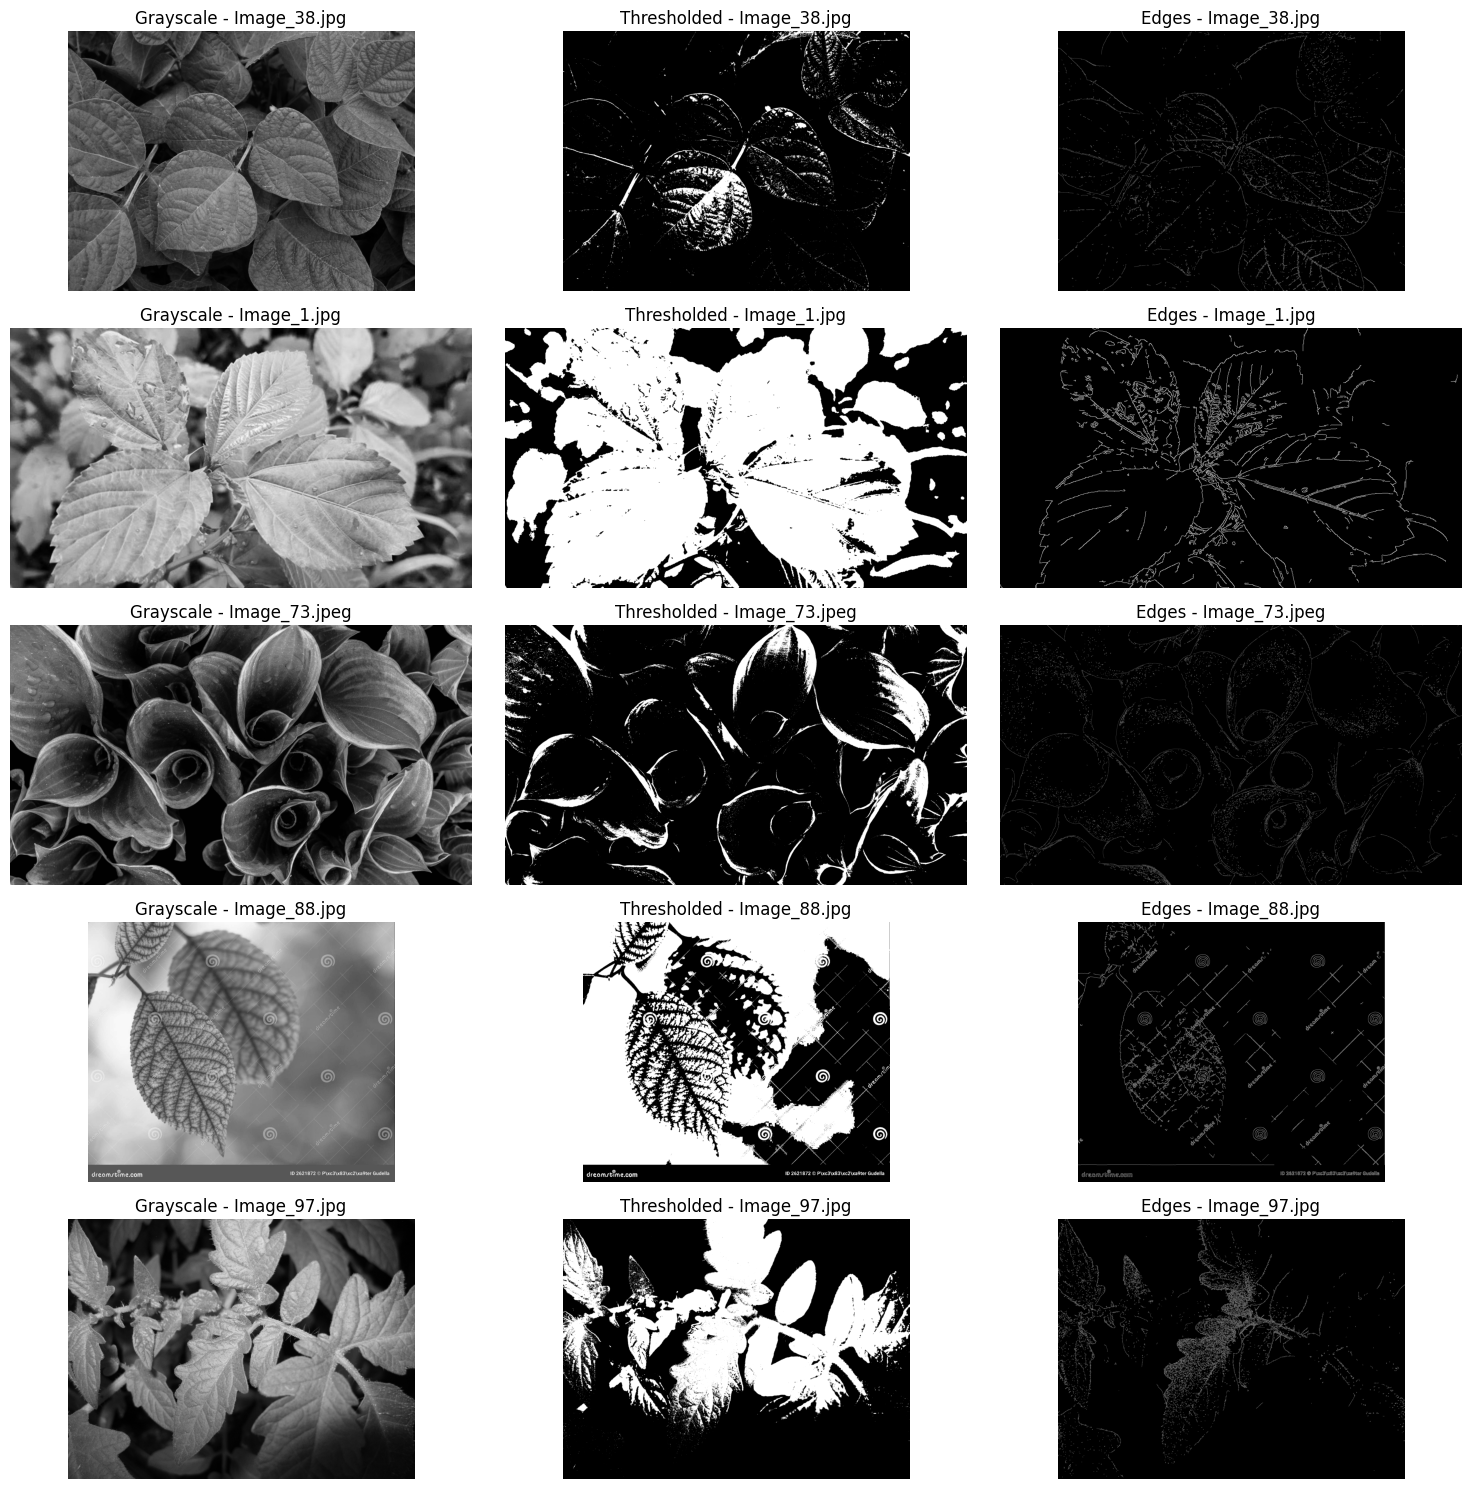

In [24]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to the dataset
dataset_path = "/content/image_dataset"

# Function to convert image to grayscale
def grayscale_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    return img

# Function to apply thresholding
def threshold_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    _, thresholded_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Thresholding
    return thresholded_img

# Function to apply edge detection (Canny)
def edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    edges = cv2.Canny(img, 100, 200)  # Canny edge detection
    return edges

# Get the images from image_dataset directory
healthy_path = os.path.join(dataset_path, "healthy leaves")
disease_path = os.path.join(dataset_path, "disease leaf")

# Combine both directories
image_paths = [os.path.join(healthy_path, img) for img in os.listdir(healthy_path)] + \
              [os.path.join(disease_path, img) for img in os.listdir(disease_path)]

# Limit to first 5 images
image_paths = image_paths[:5]

# Display results for the first 5 images
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

for i, image_path in enumerate(image_paths):
    # Read and process the image
    grayscale_img = grayscale_image(image_path)
    thresholded_img = threshold_image(image_path)
    edges_img = edge_detection(image_path)

    # Display the images
    axes[i, 0].imshow(grayscale_img, cmap='gray')
    axes[i, 0].set_title(f"Grayscale - {os.path.basename(image_path)}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(thresholded_img, cmap='gray')
    axes[i, 1].set_title(f"Thresholded - {os.path.basename(image_path)}")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(edges_img, cmap='gray')
    axes[i, 2].set_title(f"Edges - {os.path.basename(image_path)}")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()


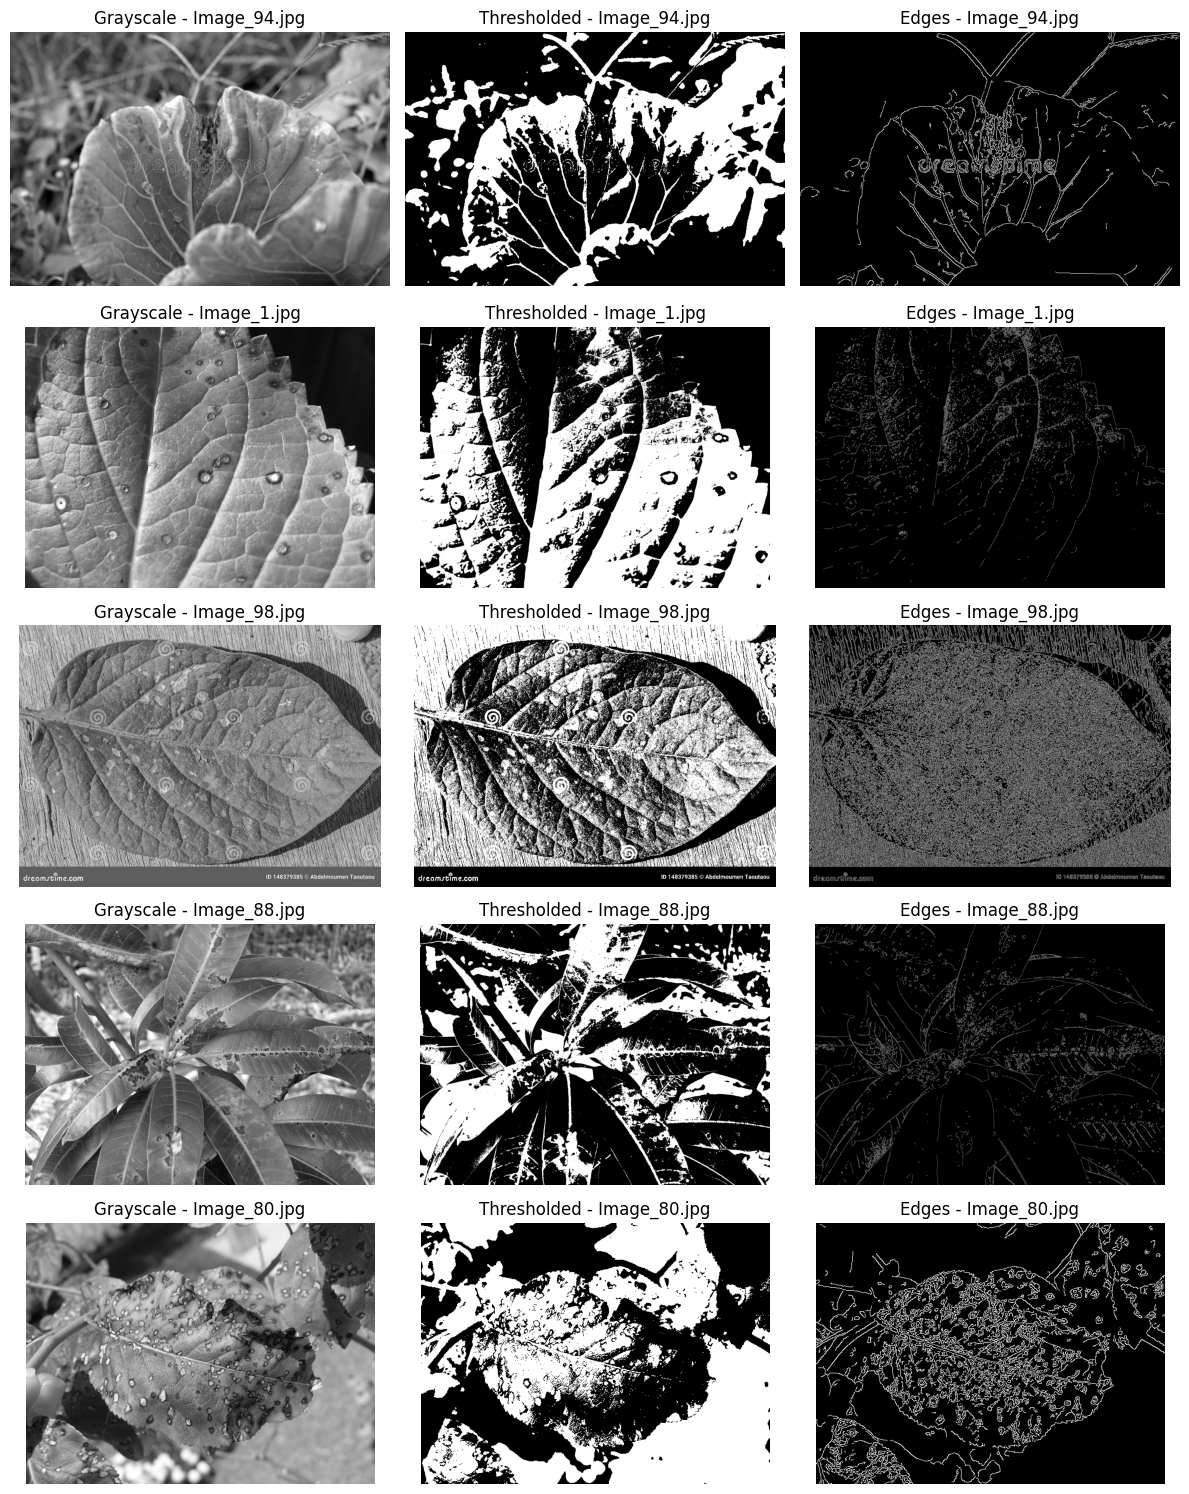

In [29]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to the dataset
dataset_path = "/content/image_dataset"

# Function to convert image to grayscale
def grayscale_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    return img

# Function to apply thresholding
def threshold_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    _, thresholded_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Thresholding
    return thresholded_img

# Function to apply edge detection (Canny)
def edge_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    edges = cv2.Canny(img, 100, 200)  # Canny edge detection
    return edges

# Get the "disease leaf" images
disease_path = os.path.join(dataset_path, "disease leaf")
disease_images = [os.path.join(disease_path, img) for img in os.listdir(disease_path) if img.endswith(('jpg', 'png', 'jpeg'))]

# Limit to first 5 images for display
disease_images = disease_images[:5]

# Create a figure with 5 rows and 3 columns to display results
fig, axes = plt.subplots(5, 3, figsize=(12, 15))

# Process and display disease leaf images
for i, image_path in enumerate(disease_images):
    # Read and process the image
    grayscale_img = grayscale_image(image_path)
    thresholded_img = threshold_image(image_path)
    edges_img = edge_detection(image_path)

    # Display the grayscale, thresholded, and edge images
    axes[i, 0].imshow(grayscale_img, cmap='gray')
    axes[i, 0].set_title(f"Grayscale - {os.path.basename(image_path)}")
    axes[i, 0].axis('off')

    axes[i, 1].imshow(thresholded_img, cmap='gray')
    axes[i, 1].set_title(f"Thresholded - {os.path.basename(image_path)}")
    axes[i, 1].axis('off')

    axes[i, 2].imshow(edges_img, cmap='gray')
    axes[i, 2].set_title(f"Edges - {os.path.basename(image_path)}")
    axes[i, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


## **Normalization**

In [30]:
from sklearn.preprocessing import StandardScaler
# Extract features for training
features = []
labels = []

dataset_path = "/content/image_dataset"

for folder_name in ['healthy leaves', 'disease leaf']:
    folder_path = os.path.join(dataset_path, folder_name)
    label = 0 if folder_name == 'healthy leaves' else 1

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)


        if os.path.isdir(img_path):
            continue

        img_array = preprocess_image(img_path)
        feature_map = model.predict(img_array)  # Extract feature map
        flattened_features = feature_map.flatten()  # Flatten the feature map
        features.append(flattened_features)
        labels.append(label)

features = np.array(features)
labels = np.array(labels)

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 766ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

### **Split Dataset into train, test and validation Data**

In [32]:
import os
import shutil
import random

# Path to the dataset
dataset_path = "/content/image_dataset"

# Function to split the dataset into training, validation, and test sets
def split_dataset(dataset_path, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    assert train_ratio + val_ratio + test_ratio == 1, "The ratios must sum to 1."

    # Directories for healthy and disease leaf images
    healthy_path = os.path.join(dataset_path, "healthy leaves")
    disease_path = os.path.join(dataset_path, "disease leaf")

    # Create directories for the split datasets
    splits = ["train", "val", "test"]
    for split in splits:
        os.makedirs(os.path.join(dataset_path, split, "healthy leaves"), exist_ok=True)
        os.makedirs(os.path.join(dataset_path, split, "disease leaf"), exist_ok=True)

    # Function to split images for a given folder (healthy or disease)
    def split_images(source_folder, target_folder):
        images = [img for img in os.listdir(source_folder) if img.endswith(('jpg', 'png', 'jpeg'))]
        random.shuffle(images)  # Shuffle images to ensure random splitting
        total_images = len(images)

        # Calculate split sizes
        train_size = int(total_images * train_ratio)
        val_size = int(total_images * val_ratio)
        test_size = total_images - train_size - val_size  # Remaining images for test

        # Split images
        train_images = images[:train_size]
        val_images = images[train_size:train_size + val_size]
        test_images = images[train_size + val_size:]

        # Move images to their respective folders
        def move_images(images_list, split_name):
            for image in images_list:
                shutil.move(os.path.join(source_folder, image),
                            os.path.join(dataset_path, split_name, source_folder.split("/")[-1], image))

        # Move images to their respective directories
        move_images(train_images, "train")
        move_images(val_images, "val")
        move_images(test_images, "test")

    # Split both healthy and disease leaf images
    split_images(healthy_path, "healthy leaves")
    split_images(disease_path, "disease leaf")

    print("Dataset splitting completed successfully!")

# Call the function to split the dataset
split_dataset(dataset_path)


Dataset splitting completed successfully!


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/image_dataset"

# Define image size and batch size
img_size = (224, 224)  # Image size required by VGG16
batch_size = 32

# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Set up the flow_from_directory method to load images from directories
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_path, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_path, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 121 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


## **Building ML model**

In [34]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model so they are not trained
base_model.trainable = False

# Build the custom model
model = models.Sequential([
    base_model,  # Add the pre-trained VGG16 model
    layers.Flatten(),  # Flatten the output of the base model
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Final output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

## **Training the model**

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 84s 20s/step - accuracy: 0.9566 - loss: 0.1156 - val_accuracy: 0.9286 - val_loss: 0.1280
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 138s 19s/step - accuracy: 0.9486 - loss: 0.1448 - val_accuracy: 0.9286 - val_loss: 0.1131
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 20s/step - accuracy: 0.9798 - loss: 0.0785 - val_accuracy: 0.9286 - val_loss: 0.1073
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 20s/step - accuracy: 0.9795 - loss: 0.0801 - val_accuracy: 1.0000 - val_loss: 0.1008
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 138s 20s/step - accuracy: 0.9659 - loss: 0.0725 - val_accuracy: 0.9286 - val_loss: 0.1076
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 20s/step - accuracy: 0.9967 - loss: 0.0716 - val_accuracy: 0.9286 - val_loss: 0.1047
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 19s/step - accuracy: 0.9510 - loss: 0.0911 - val_accuracy: 1.0000 - val_loss: 0.0779
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 81s 19s/step - accuracy: 0.9458 - loss: 0.1226 - val_accuracy: 1.0000 - val_loss: 0.073

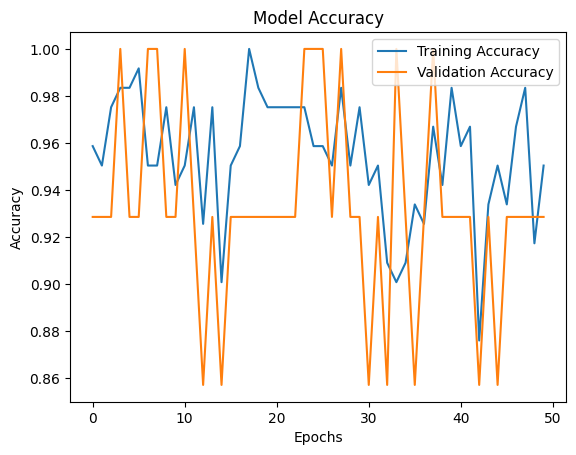

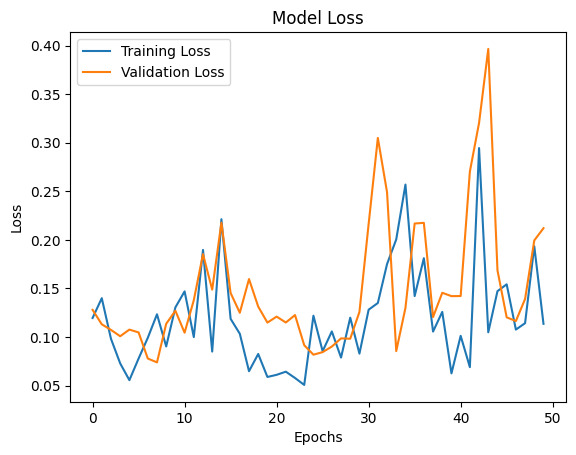

In [48]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,  # the number of epochs
    validation_data=val_generator
)
import matplotlib.pyplot as plt

history = model.history.history

# Plot accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **Evaluating performance of the model**

In [49]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8824 - loss: 0.4257
Test Accuracy: 0.8823529481887817
Test Loss: 0.4257086217403412


## **Confusion Matrix**

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


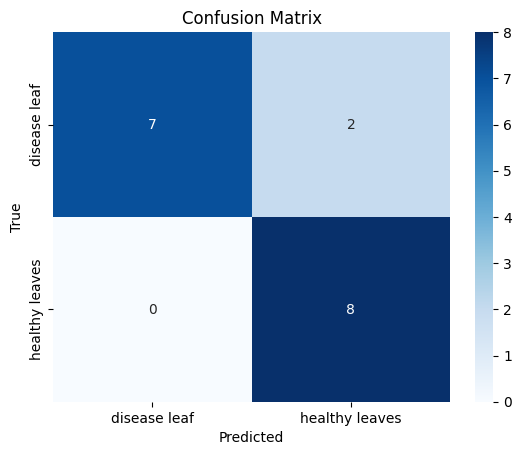

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int)

y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [51]:
model.save('disease_prediction.h5')
print("Model saved successfully!")

Model saved successfully!
